<a href="https://colab.research.google.com/github/CodeHunterOfficial/ABC_DataMining/blob/main/ML/%D0%A2%D0%B5%D0%BC%D0%B0_3_Bagging_Tree_Models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# **Математические основы решающих деревьев**

## **Модели Bagging Tree (Бэггинг деревьев)**  

### **Краткое описание**  
Bagging (Bootstrap Aggregating) — это метод ансамблевого обучения, который уменьшает дисперсию модели за счёт создания нескольких базовых моделей (например, решающих деревьев), обученных на различных подмножествах исходных данных. Итоговое предсказание формируется путём усреднения (в задачах регрессии) или голосования (в задачах классификации).  



### **a. Различие между бэггингом и бустингом**  
**Сравнение бэггинга и бустинга:**

| **Аспект**                 | **Бэггинг**                                                                                   | **Бустинг**                                                                                  |
|----------|--------|------------|
| **Тип ансамбля**           | Параллельный: модели обучаются независимо.                                                    | Последовательный: каждая модель корректирует ошибки предыдущей.                             |
| **Цель ансамбля**          | Уменьшение дисперсии и переобучения.                                                          | Уменьшение смещения.                                                                        |
| **Подход к обучению**      | Использует бутстрап-выборки для создания независимых моделей.                                  | Каждая следующая модель уделяет больше внимания ошибкам предыдущих.                         |
| **Пример алгоритма**       | Random Forest                                                                                 | Gradient Boosting, AdaBoost                                                                 |
| **Параллелизация**         | Легко распараллеливается, так как модели обучаются независимо.                                | Ограниченная параллелизация из-за последовательного характера обучения.                     |



### **b. Алгоритм классификации Bagging Tree**

**Описание:**  
Классификация с использованием Bagging Tree заключается в создании нескольких деревьев решений на различных бутстрап-выборках и последующем объединении их предсказаний методом большинства голосов.  

**Алгоритм:**  
1. **Инициализация:** Задать:  
   - $T$: количество деревьев.  
   - $n$: размер каждой бутстрап-выборки.  

2. **Обучение:**  
   Для каждого дерева $t = 1, 2, \dots, T$:  
   - Сгенерировать бутстрап-выборку $D_t$ из исходного набора данных $D$.  
   - Обучить дерево решений $h_t(x)$ на бутстрап-выборке $D_t$.  

3. **Классификация:**  
   Для нового примера $x$, определить итоговый класс $G(x)$:  
$$
   G(x) = \underset{y \in Y}{\arg\max} \sum_{t=1}^T \mathbb{I}[h_t(x) = y],
$$  
   где $Y$ — множество возможных классов, $\mathbb{I}$ — индикаторная функция.

**Итог:** Прогноз формируется на основе большинства голосов.  



### **c. Алгоритм регрессии Bagging Tree**

**Описание:**  
Регрессия с использованием Bagging Tree формирует предсказание как среднее всех базовых моделей.  

**Алгоритм:**  
1. **Инициализация:** Задать:  
   - $T$: количество деревьев.  
   - $n$: размер каждой бутстрап-выборки.  

2. **Обучение:**  
   Для каждого дерева $t = 1, 2, \dots, T$:  
   - Сгенерировать бутстрап-выборку $D_t$ из исходного набора данных $D$.  
   - Обучить дерево решений $h_t(x)$ на бутстрап-выборке $D_t$.  

3. **Предсказание:**  
   Для нового примера $x$, итоговое предсказание $G(x)$:  
$$
   G(x) = \frac{1}{T} \sum_{t=1}^T h_t(x).
$$  

**Итог:** Финальная оценка формируется как среднее всех предсказаний.  



### **d. Основные математические свойства Bagging Tree**

1. **Уменьшение дисперсии:**  
   Пусть $h_t(x)$ — предсказание $t$-й модели, а $G(x)$ — итоговое предсказание. Если модели $h_t(x)$ слабо скоррелированы, то дисперсия итогового предсказания уменьшается:  
$$
   \text{Var}(G(x)) = \frac{1}{T^2} \sum_{t=1}^T \text{Var}(h_t(x)) + \frac{1}{T^2} \sum_{i \neq j} \text{Cov}(h_i(x), h_j(x)).
$$  

2. **Свойства бутстрап-выборки:**  
   В среднем каждая бутстрап-выборка включает около $63.2\%$ уникальных наблюдений исходного набора данных (за счёт вытеснения дубликатами).  

3. **Сложность:**  
   Алгоритм Bagging масштабируется линейно относительно количества базовых моделей $T$.  



### **e. Преимущества и недостатки Bagging Tree**

**Преимущества:**  
- Устойчивость к переобучению.  
- Уменьшение дисперсии предсказаний.  
- Легкость распараллеливания процесса обучения.  

**Недостатки:**  
- Модели Bagging менее эффективны при наличии значительного смещения.  
- Повышенная потребность в вычислительных ресурсах из-за создания нескольких моделей.  




Рассмотрим **пошаговый пример применения Bagging Tree для задачи классификации**, используя набор данных $D = \{(x_1, y_1), (x_2, y_2), \dots, (x_6, y_6)\}$, где $y \in \{-1, 1\}$. Мы будем строить 3 базовых дерева и использовать алгоритм наглядно.



### **Данные:**
Набор данных:  
$$
D = \{(x_1, -1), (x_2, 1), (x_3, -1), (x_4, 1), (x_5, -1), (x_6, 1)\}.
$$

Для простоты предположим, что каждый объект описывается только одним признаком $x$.



### **Шаг 1. Бутстрапирование (создание подвыборок)**  
Мы случайно выбираем подмножества из $D$ с возвращением.  

#### Подвыборки:
- **$D_1$:** $\{(x_2, 1), (x_4, 1), (x_4, 1), (x_5, -1), (x_3, -1), (x_2, 1)\}$  
- **$D_2$:** $\{(x_1, -1), (x_6, 1), (x_3, -1), (x_4, 1), (x_1, -1), (x_5, -1)\}$  
- **$D_3$:** $\{(x_3, -1), (x_2, 1), (x_5, -1), (x_1, -1), (x_6, 1), (x_4, 1)\}$.  



### **Шаг 2. Обучение базовых деревьев на каждой подвыборке**  

#### **Дерево $h_1(x)$:**
Обучаем дерево $h_1(x)$ на $D_1$:  
1. Создаём разделение по значениям $x$. Например, $x = 3$ (условное разделение).  
2. Результаты классификации:  
$$
   h_1(x) =
   \begin{cases}
   -1, & \text{если } x \leq 3, \\
   1, & \text{если } x > 3.  
   \end{cases}
$$



#### **Дерево $h_2(x)$:**
Обучаем дерево $h_2(x)$ на $D_2$:  
1. Создаём разделение по значениям $x$. Например, $x = 4$.  
2. Результаты классификации:  
$$
   h_2(x) =
   \begin{cases}
   -1, & \text{если } x \leq 4, \\
   1, & \text{если } x > 4.  
   \end{cases}
$$



#### **Дерево $h_3(x)$:**
Обучаем дерево $h_3(x)$ на $D_3$:  
1. Создаём разделение по значениям $x$. Например, $x = 2$.  
2. Результаты классификации:  
$$
   h_3(x) =
   \begin{cases}
   -1, & \text{если } x \leq 2, \\
   1, & \text{если } x > 2.  
   \end{cases}
$$



### **Шаг 3. Предсказание итогового ансамбля**
Для нового объекта $x = 3.5$:  

#### Предсказания базовых деревьев:
- $h_1(3.5) = 1$  
- $h_2(3.5) = -1$  
- $h_3(3.5) = 1$.  



#### Итоговое предсказание (метод большинства голосов):  
$$
G(x) = \underset{y \in \{-1, 1\}}{\arg\max} \sum_{t=1}^T \mathbb{I}[h_t(x) = y].
$$

Подсчёт голосов:  
- $y = 1$: $\sum \mathbb{I}[h_t(x) = 1] = 2$.  
- $y = -1$: $\sum \mathbb{I}[h_t(x) = -1] = 1$.  

Итоговое предсказание:  
$$
G(3.5) = 1.
$$



### **Финальный результат:**  
Для объекта $x = 3.5$ итоговая модель Bagging Tree предсказывает класс $y = 1$.  



### **Шаги для задачи регрессии**  
Для регрессии предсказания базовых моделей $h_t(x)$ усредняются:  
$$
G(x) = \frac{1}{T} \sum_{t=1}^T h_t(x).
$$

Например, если $h_1(3.5) = 4.2$, $h_2(3.5) = 3.8$, $h_3(3.5) = 4.0$:  
$$
G(3.5) = \frac{4.2 + 3.8 + 4.0}{3} = 4.0.
$$  

Этот подход позволяет снизить дисперсию в итоговых предсказаниях.






### **f Пример использования Bagging Tree**

#### **Классификация (Python):**  

Individual Predictions:
h1(3.5): 1, h2(3.5): -1, h3(3.5): 1
Final Prediction (Majority Voting): 1


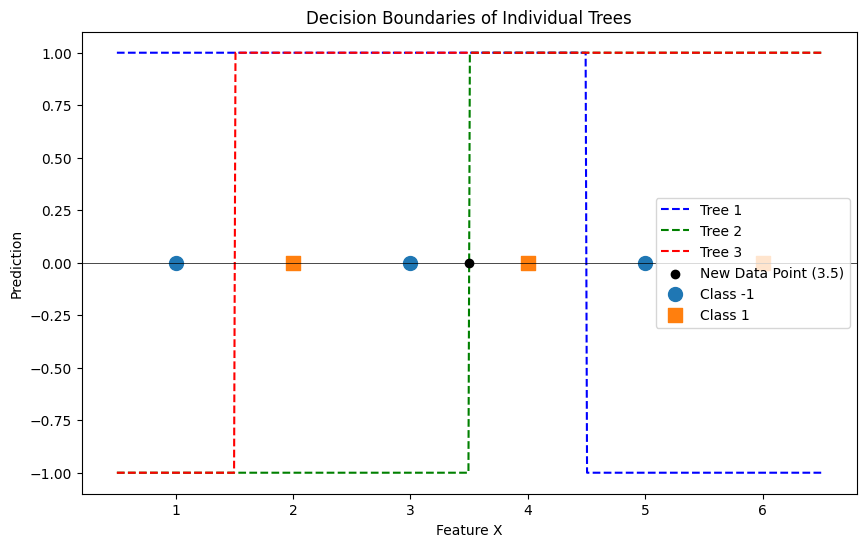

Bagging Model Prediction for x=3.5: -1


In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier

# Step 1: Define the dataset
X = np.array([[1], [2], [3], [4], [5], [6]])
y = np.array([-1, 1, -1, 1, -1, 1])

# Step 2: Manually create bootstrap samples
D1_indices = [1, 3, 3, 4, 2, 1]
D2_indices = [0, 5, 2, 3, 0, 4]
D3_indices = [2, 1, 4, 0, 5, 3]

D1 = X[D1_indices], y[D1_indices]
D2 = X[D2_indices], y[D2_indices]
D3 = X[D3_indices], y[D3_indices]

# Step 3: Train individual trees
h1 = DecisionTreeClassifier(max_depth=1).fit(*D1)
h2 = DecisionTreeClassifier(max_depth=1).fit(*D2)
h3 = DecisionTreeClassifier(max_depth=1).fit(*D3)

# Step 4: Define new data point for prediction
x_new = np.array([[3.5]])
h1_pred = h1.predict(x_new)
h2_pred = h2.predict(x_new)
h3_pred = h3.predict(x_new)

# Step 5: Aggregate predictions using majority voting
predictions = np.array([h1_pred[0], h2_pred[0], h3_pred[0]])
final_prediction = np.sign(np.sum(predictions))

# Print individual and final predictions
print("Individual Predictions:")
print(f"h1(3.5): {h1_pred[0]}, h2(3.5): {h2_pred[0]}, h3(3.5): {h3_pred[0]}")
print(f"Final Prediction (Majority Voting): {final_prediction}")

# Step 6: Visualize decision boundaries
plt.figure(figsize=(10, 6))
x_range = np.linspace(0.5, 6.5, 500).reshape(-1, 1)

# Plot decision boundaries of each tree
for i, (tree, color) in enumerate(zip([h1, h2, h3], ['blue', 'green', 'red']), start=1):
    y_pred = tree.predict(x_range)
    plt.plot(x_range, y_pred, label=f'Tree {i}', color=color, linestyle='--')

# Highlight new data point
plt.scatter([3.5], [0], color='black', label='New Data Point (3.5)', zorder=5)

# Plot original data
for cls, marker in zip([-1, 1], ['o', 's']):
    plt.scatter(X[y == cls], [0] * sum(y == cls), label=f'Class {cls}', marker=marker, s=100)

plt.axhline(0, color='black', linewidth=0.5)
plt.title("Decision Boundaries of Individual Trees")
plt.legend()
plt.xlabel("Feature X")
plt.ylabel("Prediction")
plt.show()

# Step 7: Train Bagging Classifier for comparison
bagging_model = BaggingClassifier(estimator=DecisionTreeClassifier(max_depth=1), n_estimators=3, bootstrap=True, random_state=42)
bagging_model.fit(X, y)
final_bagging_pred = bagging_model.predict(x_new)

print(f"Bagging Model Prediction for x=3.5: {final_bagging_pred[0]}")

##**Случайный лес (Random Forest)**

**Случайный лес (Random Forest)** — это мощный алгоритм машинного обучения, который применяется как для задач классификации, так и для задач регрессии. Его основой является метод ансамблевого обучения, при котором множество базовых моделей (деревьев решений) комбинируются для получения более устойчивых и точных результатов.



### Основные концепции случайного леса  

1. **Энсамблевый метод:**  
   - Случайный лес состоит из большого числа независимых деревьев решений. Итоговое предсказание формируется на основе их "голосов" (для классификации) или усреднения (для регрессии).

2. **Случайный отбор данных:**  
   - Каждое дерево обучается на случайной подвыборке данных (с возвратом). Это снижает вероятность переобучения и увеличивает разнообразие деревьев.

3. **Случайный отбор признаков:**  
   - При построении каждого узла дерева используется случайное подмножество признаков для выбора оптимального разбиения. Это снижает корреляцию между деревьями и делает ансамбль более стабильным.



### Подробное сравнение: Random Forest и Bagging Tree  

**Bagging Tree:**  
- Использует весь набор признаков при каждом разбиении узлов.  
- Подходит для простых моделей, где корреляция между деревьями невелика.  

**Random Forest:**  
- Для каждого узла выбирает случайное подмножество признаков, что увеличивает разнообразие деревьев.  
- Более устойчив к переобучению и часто превосходит Bagging Tree по точности.


### Подробный алгоритм работы  

#### 1. Классификация с использованием Random Forest  

**Дано:**  
- $D = \{(x_1, y_1), \dots, (x_N, y_N)\}$ — обучающий набор из $N$ объектов.  
  - $x_i \in \mathbb{R}^M$ — объект с $M$ признаками.  
  - $y_i \in \{-1, 1\}$ — метки классов.  
- $T$ — количество деревьев.  
- $n$ — размер случайной подвыборки данных.  
- $m$ — количество случайных признаков, выбираемых на каждом узле.  

**Алгоритм:**  
1. Повторить $T$ раз:  
   - Выбрать случайную подвыборку $D_{\text{subset}}$ из $n$ объектов (с возвратом).  
   - Построить дерево решений $h_t(x)$ на основе $D_{\text{subset}}$:  
     - На каждом узле выбирать $m$ случайных признаков.  
     - Найти оптимальное разбиение среди этих признаков.  
2. Итоговое предсказание — правило большинства:  
$$
   G(x) = \text{argmax}_y \sum_{t=1}^T \mathbb{I}(h_t(x) = y),
$$  
   где $\mathbb{I}(h_t(x) = y)$ — индикатор того, что дерево $h_t$ предсказало класс $y$.



#### 2. Регрессия с использованием Random Forest  

**Дано:**  
- $D = \{(x_1, y_1), \dots, (x_N, y_N)\}$ — обучающий набор из $N$ объектов.  
  - $x_i \in \mathbb{R}^M$ — объект с $M$ признаками.  
  - $y_i \in \mathbb{R}$ — численные значения.  

**Алгоритм:**  
1. Повторить $T$ раз:  
   - Сформировать подвыборку $D_{\text{subset}}$ из $n$ объектов.  
   - Построить дерево $h_t(x)$, выбирая $m$ случайных признаков на каждом узле.  
2. Итоговое предсказание — усреднение результатов:  
$$
   G(x) = \frac{1}{T} \sum_{t=1}^T h_t(x).
$$

---

### Преимущества Random Forest  

1. **Устойчивость к переобучению:**  
   - Благодаря случайности в выборке данных и признаков модель менее склонна к запоминанию обучающей выборки.  

2. **Гибкость:**  
   - Может быть применён как для классификации, так и для регрессии.  

3. **Интерпретируемость:**  
   - Позволяет оценивать важность признаков, помогая понять, какие из них оказывают наибольшее влияние на предсказание.  

4. **Масштабируемость:**  
   - Алгоритм легко распараллеливается, что делает его подходящим для больших наборов данных.  

5. **Надёжность:**  
   - Сохраняет хорошую точность даже при наличии шумных данных или пропусков в выборке.  



### Советы для начинающих  

1. **Минимальные настройки:**  
   - На первых порах используйте дефолтные параметры библиотеки (например, `n_estimators=100` в Scikit-learn).  

2. **Оценка важности признаков:**  
   - Используйте атрибут `feature_importances_` для анализа влияния признаков.  

3. **Кросс-валидация:**  
   - Для подбора гиперпараметров (например, $T$, $m$) используйте GridSearchCV или RandomizedSearchCV.  

4. **Работа с большими данными:**  
   - При очень больших наборах данных уменьшите глубину деревьев или используйте метод Mini-Batch для ускорения обучения.  



### Пример классификации с использованием **Random Forest**

#### Постановка задачи:
Имеется датасет $D = \{(x_i, y_i)\}_{i=1}^6$, содержащий объекты с двумя признаками $x_1$ и $x_2$, и метки классов ($y \in \{-1, 1\}$). Датасет выглядит так:

| Номер объекта ($i$) | $x_1$ | $x_2$ | Метка ($y$) |
|-----------------------|---------|---------|---------------|
| 1                     | 1       | 2       | 1             |
| 2                     | 2       | 1       | -1            |
| 3                     | 3       | 3       | 1             |
| 4                     | 2       | 4       | -1            |
| 5                     | 3       | 2       | 1             |
| 6                     | 4       | 3       | -1            |

Мы хотим классифицировать новый объект $x_{\text{new}} = (3, 3)$ с помощью случайного леса, содержащего $T = 3$ дерева.



### Шаг 1: Формирование случайных подвыборок
Каждое дерево обучается на случайной подвыборке с возвратом (bootstrap). Предположим, что случайные подвыборки выглядят следующим образом:

1. Для дерева $T_1$: $\{(1, 1), (3, 1), (5, 1), (1, 1), (6, -1), (4, -1)\}$.
2. Для дерева $T_2$: $\{(2, -1), (5, 1), (3, 1), (4, -1), (2, -1), (6, -1)\}$.
3. Для дерева $T_3$: $\{(4, -1), (1, 1), (2, -1), (3, 1), (6, -1), (5, 1)\}$.



### Шаг 2: Построение деревьев решений
Каждое дерево строится, используя случайное подмножество признаков на каждом разбиении. Для простоты возьмем $m = 1$ (1 случайный признак на каждом узле).

#### Пример построения дерева $T_1$:
1. **Выбор случайного признака для первого узла**: $x_1$.  
2. **Разбиение данных по $x_1$:**
   - Выбор порога разбиения $x_1 = 2.5$ (среднее между объектами $x_1 = 2$ и $x_1 = 3$).
   - Левый поддерево: $x_1 < 2.5$, метка $-1$.
   - Правое поддерево: $x_1 \geq 2.5$, метка $1$.
3. **Итоговое дерево $T_1$:**
   - Если $x_1 < 2.5$, то $-1$.
   - Если $x_1 \geq 2.5$, то $1$.



#### Повторяем аналогичные шаги для деревьев $T_2$ и $T_3$, которые выбирают свои признаки и пороги.



### Шаг 3: Предсказание для нового объекта
Объект $x_{\text{new}} = (3, 3)$ проходит через все деревья:

1. Для дерева $T_1$:
   - $x_1 = 3 \geq 2.5$ $\Rightarrow$ предсказание $1$.
2. Для дерева $T_2$:
   - Разбиение по $x_2$, $x_2 = 3 \geq 2.5$ $\Rightarrow$ предсказание $-1$.
3. Для дерева $T_3$:
   - Разбиение по $x_1$, $x_1 = 3 \geq 2.5$ $\Rightarrow$ предсказание $1$.



### Шаг 4: Итоговое предсказание
Используем правило большинства для объединения предсказаний:

- $T_1: 1$
- $T_2: -1$
- $T_3: 1$

Итоговое предсказание:
$$
G(x_{\text{new}}) = \text{argmax}_y \sum_{t=1}^T \mathbb{I}(h_t(x_{\text{new}}) = y).
$$
Голосование:
- Класс $1$: $2$ голоса.
- Класс $-1$: $1$ голос.

Итог: $G(x_{\text{new}}) = 1$.



### Результат:
Для объекта $x_{\text{new}} = (3, 3)$ алгоритм случайного леса предсказывает класс $1$.


Prediction for [[3 3]]: [1]


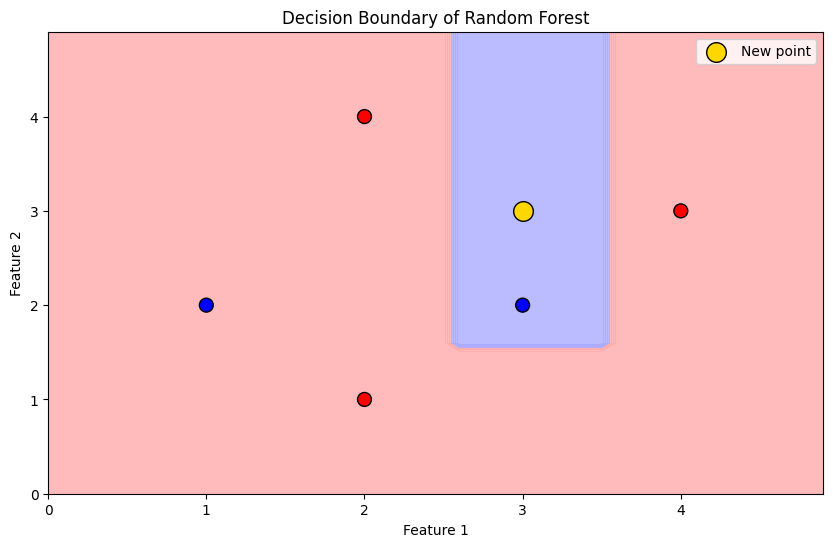

In [1]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# Данные
X = np.array([
    [1, 2],
    [2, 1],
    [3, 3],
    [2, 4],
    [3, 2],
    [4, 3]
])
y = np.array([1, -1, 1, -1, 1, -1])

# Новый объект для классификации
x_new = np.array([[3, 3]])

# Модель Random Forest
rf = RandomForestClassifier(n_estimators=3, max_features=1, random_state=42, bootstrap=True)
rf.fit(X, y)

# Предсказание
prediction = rf.predict(x_new)
print(f"Prediction for {x_new}: {prediction}")

# Визуализация границ классификации
def plot_decision_boundary(clf, X, y, x_new):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    cmap_background = ListedColormap(['#FFAAAA', '#AAAAFF'])
    cmap_points = ListedColormap(['#FF0000', '#0000FF'])

    plt.figure(figsize=(10, 6))
    plt.contourf(xx, yy, Z, alpha=0.8, cmap=cmap_background)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_points, edgecolor='k', s=100)
    plt.scatter(x_new[:, 0], x_new[:, 1], c='gold', edgecolor='k', s=200, label='New point')
    plt.title("Decision Boundary of Random Forest")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.legend()
    plt.show()

# Вызов функции визуализации
plot_decision_boundary(rf, X, y, x_new)

## Extremely Randomized Trees (ExtraTrees)

**Краткое описание:**  
Метод построения ансамбля сильных базовых моделей, обученных на всём наборе данных параллельно. Для каждой ветви дерева внутри базовых моделей используется случайный поднабор признаков, а точки разбиения выбираются случайным образом.


### a. Отличия между Random Forest и Extremely Randomized Trees  

Основное различие между Random Forest (RF) и Extremely Randomized Trees (ExtraTrees) заключается в методе выбора разбиений:  
- В Random Forest используется жадный алгоритм для выбора оптимальных разбиений на основе максимального уменьшения критериев (например, Джини или энтропии).  
- В ExtraTrees точки разбиения выбираются случайным образом, что снижает вычислительную сложность и увеличивает случайность модели.

| **Аспекты**               | **Bagging Tree** | **Random Forest** | **ExtraTrees**              |
|----------------------------|------------------|-------------------|-----------------------------|
| Поднаборы объектов         | Да               | Да                | Нет (но возможно)          |
| Поднаборы признаков        | Нет              | Да                | Да                          |
| Жадный алгоритм (Greedy)   | Да               | Да                | Нет (используется случайный выбор точек) |



### b. Алгоритм классификации с использованием Extremely Randomized Trees  

#### Входные данные:  
- **Датасет** $D = \{(x_1, y_1), (x_2, y_2), \dots, (x_N, y_N)\}, \ y \in \{-1, 1\}, x \in \mathbb{R}^M$  
- **Базовый алгоритм** $\mathcal{B}$ (дерево решений).  
- **Количество базовых алгоритмов** $T$.  
- **Количество объектов в поднаборе данных** $n$.  
- **Количество признаков, разрешённых в каждом разбиении дерева** $m$.  

#### Выходные данные:  
- Финальный классификатор $G(x)$.  

#### Шаги алгоритма:  
1. Для $t = 1, 2, \dots, T$:  
   - Случайно выбрать поднабор $D_{\text{subset}}$ из набора данных $D$ с возвратом. Каждый поднабор содержит $n$ объектов.  
   - На основе $D_{\text{subset}}$ обучить базовый алгоритм $\mathcal{B}_t$.  
     - В каждом узле дерева:  
       - Выбрать $m$ случайных признаков \(\{A_1, A_2, \dots, A_m\}\).  
       - Для каждого признака $A_i$ сгенерировать случайную точку разбиения $c_i$ из равномерного распределения $[\min A_i, \max A_i]$.  
       - Среди всех разбиений выбрать то, которое даёт наибольшее уменьшение Джини или энтропии.  

2. Финальный классификатор $G(x)$ строится как агрегированный результат:  
$$
   G(x) = \text{argmax}_y \sum_{t=1}^T \mathbb{I}(f_t(x) = y), \quad y \in \{-1, 1\}.
$$



### c. Алгоритм регрессии с использованием Extremely Randomized Trees  

#### Входные данные:  
- **Датасет** $D = \{(x_1, y_1), (x_2, y_2), \dots, (x_N, y_N)\}, \ y \in \mathbb{R}, x \in \mathbb{R}^M$  
- **Базовый алгоритм** $\mathcal{B}$ (дерево решений).  
- **Количество базовых алгоритмов** $T$.  
- **Количество объектов в поднаборе данных** $n$.  
- **Количество признаков, разрешённых в каждом разбиении дерева** $m$.  

#### Выходные данные:  
- Финальный регрессор $G(x)$.  

#### Шаги алгоритма:  
1. Для $t = 1, 2, \dots, T$:  
   - Случайно выбрать поднабор $D_{\text{subset}}$ из набора данных $D$ с возвратом. Каждый поднабор содержит $n$ объектов.  
   - На основе $D_{\text{subset}}$ обучить базовый алгоритм $\mathcal{B}_t$.  
     - В каждом узле дерева:  
       - Выбрать $m$ случайных признаков \(\{A_1, A_2, \dots, A_m\}\).  
       - Для каждого признака $A_i$ сгенерировать случайную точку разбиения $c_i$ из равномерного распределения $[\min A_i, \max A_i]$.  
       - Среди всех разбиений выбрать то, которое минимизирует среднеквадратичную ошибку (MSE).  

2. Финальный регрессор $G(x)$ строится как среднее предсказание всех базовых алгоритмов:  
$$
   G(x) = \frac{1}{T} \sum_{t=1}^T f_t(x).
$$

Таким образом, метод Extremely Randomized Trees достигает высокой производительности за счёт увеличенной случайности при построении базовых моделей, что помогает снизить переобучение и улучшить обобщающую способность ансамбля.



Давайте рассмотрим числовой пример для классификации с использованием метода **Extremely Randomized Trees** (ExtraTrees), следуя алгоритму, описанному выше.

### Шаг 1: Подготовка данных

Предположим, у нас есть небольшой набор данных с 5 объектами и 2 признаками:

$$
D = \{(x_1, y_1), (x_2, y_2), (x_3, y_3), (x_4, y_4), (x_5, y_5)\}
$$
где $x_i = (x_{i1}, x_{i2})$ — это два признака объекта, а $y_i \in \{-1, 1\}$ — метка класса.

$$
D = \{((2.5, 3.1), 1), ((3.2, 4.1), -1), ((1.7, 2.3), 1), ((2.9, 3.6), -1), ((4.1, 5.0), 1)\}
$$

Задача — построить классификатор с помощью ExtraTrees, используя два базовых дерева и случайный выбор признаков.

### Шаг 2: Обучение базовых алгоритмов

#### Итерация 1: Построение первого дерева

1. **Случайный выбор поднабора данных:**  
   Пусть поднабор $D_{\text{subset}}$ для первого дерева состоит из объектов $(x_1, y_1), (x_3, y_3), (x_5, y_5)$, то есть:
   
$$
   D_{\text{subset}} = \{((2.5, 3.1), 1), ((1.7, 2.3), 1), ((4.1, 5.0), 1)\}
$$

2. **Выбор случайных признаков:**  
   Пусть $m = 1$ (т.е. выбирается только один случайный признак на каждом узле дерева).  
   Для первого узла дерева случайным образом выбираем один из признаков. Пусть выбрали $A_1$ (первый признак).

3. **Выбор случайных точек разбиения:**  
   Для каждого выбранного признака генерируем случайную точку разбиения $c_1$ на интервале $[ \min A_1, \max A_1 ]$.  
   Для признака $A_1$ (первый признак) минимальное значение $ \min A_1 = 1.7 $, максимальное значение $ \max A_1 = 4.1 $. Случайным образом генерируем точку разбиения $c_1 = 2.8$.

4. **Построение дерева:**  
   Для каждого узла дерева, используя выбранные признаки и точки разбиений, дерево продолжает обучение.

#### Итерация 2: Построение второго дерева

Аналогично, случайным образом выбираем поднабор данных $D_{\text{subset}} = \{((3.2, 4.1), -1), ((2.9, 3.6), -1), ((4.1, 5.0), 1)\}$ и обучаем дерево, повторяя шаги для выбора признаков и точек разбиения.

### Шаг 3: Агрегирование результатов

После того как оба дерева обучены, необходимо сделать предсказания для нового объекта $x = (3.0, 4.0)$ (например, объект для классификации).

#### 1. Предсказания от деревьев

Для первого дерева предсказание может быть $f_1(x) = 1$, а для второго дерева $f_2(x) = -1$.

#### 2. Финальное предсказание

Теперь, чтобы получить финальное предсказание, мы агрегируем результаты всех деревьев:
$$
G(x) = \text{argmax}_y \sum_{t=1}^T \mathbb{I}(f_t(x) = y), \quad y \in \{-1, 1\}
$$
где $\mathbb{I}$ — индикаторная функция, которая принимает значение 1, если $f_t(x) = y$, и 0 в противном случае.

Подсчитаем количество предсказаний для каждого класса:
- Для класса $y = 1$: $f_1(x) = 1$ и $f_2(x) = -1$ — одно предсказание для класса $1$ (из первого дерева).
- Для класса $y = -1$: $f_1(x) = 1$ и $f_2(x) = -1$ — одно предсказание для класса $-1$ (из второго дерева).

Таким образом, финальное предсказание будет равно $y = 1$, так как количество предсказаний для этого класса больше или равно количеству предсказаний для класса $-1$.

### Шаг 4: Итоговое предсказание

Итак, для нового объекта $x = (3.0, 4.0)$ метод **Extremely Randomized Trees** дает итоговое предсказание $G(x) = 1$.



Таким образом, метод ExtraTrees использует случайный выбор признаков и разбиений, что позволяет моделям быть менее склонными к переобучению, а также ускоряет процесс обучения по сравнению с Random Forest, где разбиения выбираются более оптимально, но с большей вычислительной нагрузкой.



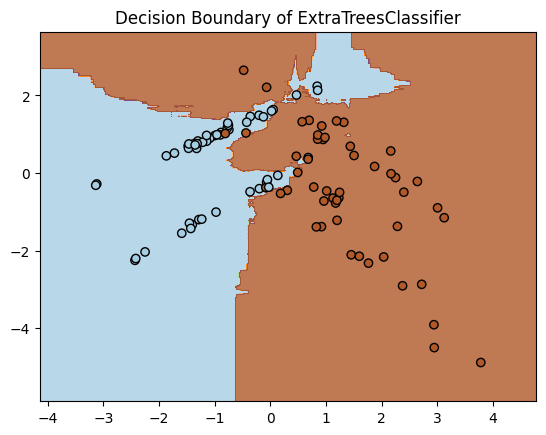

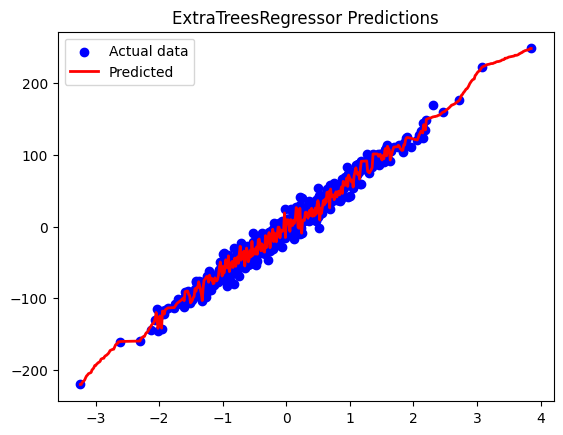

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification, make_regression
from sklearn.ensemble import ExtraTreesClassifier, ExtraTreesRegressor
from sklearn.model_selection import train_test_split

# === Классификация с ExtraTreesClassifier ===

# Генерация синтетических данных
X, y = make_classification(
    n_samples=500, n_features=2, n_informative=2, n_redundant=0, random_state=42
)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Создание и обучение модели
clf = ExtraTreesClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Визуализация границ решений
def plot_decision_boundary(X, y, model):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(
        np.arange(x_min, x_max, 0.01),
        np.arange(y_min, y_max, 0.01)
    )
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.Paired)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor="k", cmap=plt.cm.Paired)
    plt.title("Decision Boundary of ExtraTreesClassifier")
    plt.show()

plot_decision_boundary(X_test, y_test, clf)

# === Регрессия с ExtraTreesRegressor ===

# Генерация синтетических данных
X, y = make_regression(
    n_samples=500, n_features=1, noise=10, random_state=42
)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Создание и обучение модели
reg = ExtraTreesRegressor(n_estimators=100, random_state=42)
reg.fit(X_train, y_train)

# Визуализация предсказаний модели
X_plot = np.linspace(X.min(), X.max(), 500).reshape(-1, 1)
y_pred = reg.predict(X_plot)

plt.scatter(X, y, color="blue", label="Actual data")
plt.plot(X_plot, y_pred, color="red", linewidth=2, label="Predicted")
plt.title("ExtraTreesRegressor Predictions")
plt.legend()
plt.show()